# Proyecto ML: Modelo predictivo de precios de coche.

En este proyecto, se utilizarán modelos de Machine Learning para calcular el precio de un coche a partir de características como la marca, modelo, tipo de combustible, año, etc. Se trata, por tanto, de un problema de regresión.

El objetivo es tener una plataforma web donde poder saber el precio de un determinado vehículo, en base al precio de otros vehículos registrados en nuestra base de datos. Para ello, se utiliza una tabla con cerca de 50000 registros de vehículos de la base de datos de nuestra red de concesionarios.

## 1. Obtención y procesado de datos.

In [207]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [208]:
df = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
df

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

Vemos que el DataFrame se compone de 21 columnas, de las cuales, muchas de ellas son de tipo string. Además, contienen valores nulos, por lo que, a continuación, haremos un procesado de estas columnas.

La columna target u objetivo a predecir, es la columna llamada ```"price"```, por lo que eliminaremos la columna ```"price_financed"```, ya que contiene muchos valores nulos y no es la variable que queremos predecir.

In [210]:
df = df.drop(columns="price_financed")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   fuel             49954 non-null  object 
 7   year             49998 non-null  float64
 8   kms              50000 non-null  int64  
 9   power            41472 non-null  float64
 10  doors            50000 non-null  int64  
 11  shift            49889 non-null  object 
 12  color            49406 non-null  object 
 13  photos           50000 non-null  int64  
 14  is_professional  50000 non-null  bool   
 15  dealer           50000 non-null  object 
 16  province         49994 non-null  object 
 17  country     

Vamos a eliminar también las columnas ```['url', 'company', 'dealer', 'province', 'country', 'publish_date', 'insert_date']```, ya que tampoco aportan información para el modelo.

In [211]:
df = df.drop(columns=["url", "company", 'dealer', 'province', 'country', 'publish_date', 'insert_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             49998 non-null  object 
 1   model            49995 non-null  object 
 2   version          50000 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49954 non-null  object 
 5   year             49998 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  photos           50000 non-null  int64  
 12  is_professional  50000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [212]:
df["power"].value_counts(dropna=False)

power
NaN      8528
150.0    4223
110.0    2325
115.0    1903
120.0    1867
         ... 
52.0        1
772.0       1
263.0       1
316.0       1
57.0        1
Name: count, Length: 348, dtype: int64

En la columna ```"power"``` hay 8528 valores nulos. Vamos a eliminar las filas que no contienen este valor, ya que tenemos una cantidad de datos abundante y puede ser un parámetro sensible en el modelo, por lo que tratar de rellenar esos NaN por alguna métrica como la media, puede afectar negativamente.

In [213]:
df.loc[df.loc[:, "power"].isna() == True, :]

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional
0,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False
11,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 3p.,1700,Diésel,1990.0,350000,NaN,3,Manual,Rojo,4,False
16,BMW,Serie 3,BMW Serie 3 5p.,4200,Diésel,2005.0,240000,NaN,5,Automático,Gris / Plata,7,False
18,MAZDA,Mazda5,MAZDA,5100,Diésel,2009.0,189500,NaN,5,Manual,Negro,0,False
19,BMW,Serie 1,BMW,5900,Diésel,2009.0,129000,NaN,3,Manual,Marrón,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49949,RENAULT,Mégane,RENAULT,1150,Gasolina,2001.0,252230,NaN,5,Manual,Verde,0,False
49965,VOLKSWAGEN,Polo,VOLKSWAGEN,1600,Gasolina,2005.0,199700,NaN,3,Manual,Gris / Plata,0,False
49968,MERCEDES-BENZ,Vito,MERCEDES-BENZ Vito 5p.,3200,Diésel,2002.0,260000,NaN,5,Manual,Azul,0,False
49975,OPEL,Astra,OPEL,750,Diésel,2001.0,210000,NaN,3,Manual,Blanco,0,False


In [214]:
df = df.drop(index=(df.loc[df.loc[:, "power"].isna() == True, :]).index)
df

,make,model,version,price,fuel,year,kms,power,doors,shift,color,photos,is_professional
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True
5,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,Blanco,32,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,Gasolina,2018.0,47000,140.0,5,Automático,Gris / Plata,26,True
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Diésel,2015.0,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),30,True
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Gasolina,2019.0,21422,72.0,5,Manual,Gris / Plata,17,True
49998,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,Gasolina,2013.0,47900,450.0,5,Automático,Gris / Plata (Antracita),20,True


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41472 entries, 1 to 49999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41470 non-null  object 
 1   model            41471 non-null  object 
 2   version          41472 non-null  object 
 3   price            41472 non-null  int64  
 4   fuel             41470 non-null  object 
 5   year             41470 non-null  float64
 6   kms              41472 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            41472 non-null  int64  
 9   shift            41361 non-null  object 
 10  color            41369 non-null  object 
 11  photos           41472 non-null  int64  
 12  is_professional  41472 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 4.2+ MB


Las columnas ```"color"``` y ```"shift"``` siguen teniendo bastantes NaN.

In [216]:
df["color"].value_counts()

color
Blanco                                              9681
Gris / Plata                                        7971
Negro                                               6271
Azul                                                3996
Rojo                                                2323
                                                    ... 
Negro (7 PLAZAS)                                       1
Granate (Polar)                                        1
Blanco (Blanco Perlado / Techo Negro Metalizado)       1
Negro (Negro Diamond)                                  1
Azul (OFERTA MES!!! ENTREGA INMEDIATA!!!)              1
Name: count, Length: 3530, dtype: int64

Vamos a eliminar la columna color, ya que es una columna categórica con 3530 valores únicos.

In [217]:
df = df.drop(columns="color")

In [218]:
df["shift"].value_counts()

shift
Manual        27313
Automático    14048
Name: count, dtype: int64

Como en la columna ```"shift"``` existen muchos coches manuales y automáticos, vamos a eliminar las filas con valores de ```"shift"``` nulos.

In [219]:
df = df.drop(index=(df.loc[df.loc[:, "shift"].isna() == True, :]).index)
df

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,6,True
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,10,True
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,9,True
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,4,True
5,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,32,True
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,Gasolina,2018.0,47000,140.0,5,Automático,26,True
49996,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,Diésel,2015.0,68750,150.0,2,Manual,30,True
49997,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,Gasolina,2019.0,21422,72.0,5,Manual,17,True
49998,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,Gasolina,2013.0,47900,450.0,5,Automático,20,True


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41361 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41359 non-null  object 
 1   model            41360 non-null  object 
 2   version          41361 non-null  object 
 3   price            41361 non-null  int64  
 4   fuel             41359 non-null  object 
 5   year             41359 non-null  float64
 6   kms              41361 non-null  int64  
 7   power            41361 non-null  float64
 8   doors            41361 non-null  int64  
 9   shift            41361 non-null  object 
 10  photos           41361 non-null  int64  
 11  is_professional  41361 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 3.8+ MB


Eliminamos también las entradas que quedan con algún NaN.

In [221]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  object 
 1   model            41354 non-null  object 
 2   version          41354 non-null  object 
 3   price            41354 non-null  int64  
 4   fuel             41354 non-null  object 
 5   year             41354 non-null  float64
 6   kms              41354 non-null  int64  
 7   power            41354 non-null  float64
 8   doors            41354 non-null  int64  
 9   shift            41354 non-null  object 
 10  photos           41354 non-null  int64  
 11  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 3.8+ MB


In [222]:
df.head()

,make,model,version,price,fuel,year,kms,power,doors,shift,photos,is_professional
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,5,Manual,6,True
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,4,Manual,10,True
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,4,Manual,9,True
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,2,Manual,4,True
5,PEUGEOT,3008,PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.,11490,Gasolina,2016.0,78665,130.0,5,Manual,32,True


In [223]:
make_model_set = {}

for index, row in df.iterrows():
    make = row['make']
    model = row['model']
    
    if make not in make_model_set:
        make_model_set[make] = {model}
    else:
        make_model_set[make].add(model)

with open('../utils/make_model_set.pkl', 'wb') as archivo_salida3:
    pickle.dump(make_model_set, archivo_salida3)

print(make_model_set)

{'CITROEN': {'Jumpy', 'C5 Aircross', 'DS4', 'DS3', 'C4', 'C4 Cactus', 'Berlingo', 'Nemo', 'C4 Sedán', 'Evasión', 'ë-C4', 'C3 Pluriel', 'C-Crosser', 'ZX', 'Xsara Picasso', 'AX', 'C4 Spacetourer', 'C1', 'Saxo', 'C3', 'C-Zero', 'C3 Picasso', 'C5', 'C3 Aircross', 'C2', 'C8', 'Grand C4 Picasso', 'Spacetourer', 'C6', 'C4 Picasso', '2CV', 'BX', 'DS5', 'Jumper', 'C-Elysée', 'Xsara', 'C4 Aircross', 'C-15', 'Xantia', 'Grand C4 Spacetourer', 'C5 Aircross Hybrid'}, 'FORD': {'Mustang', 'Transit Connect', 'C-Max', 'KA', 'Mondeo', 'Explorer', 'Connect', 'Escort', 'EcoSport', 'Tourneo Custom', 'Transit Custom', 'Grand C-Max', 'Kuga', 'Edge', 'Maverick', 'Probe', 'Focus C-MAX', 'Tourneo Courier', 'B-MAX', 'S-MAX', 'Focus', 'Fusion', 'Tourneo Connect', 'Courier', 'Grand Tourneo Connect', 'Fiesta', 'Ranger', 'Sierra', 'Capri', 'Ka+', 'Fiesta Van', 'Galaxy', 'Transit Courier', 'Transit', 'Puma'}, 'VOLKSWAGEN': {'Arteon', 'LT', 'Bora', 'Golf Sportsvan', 'e-up!', 'Santana', 'ID.3', 'Crafter', 'CC', 'Multiva

Ya no tenemos valores nulos, vamos a procesar las columnas restantes para que puedan ser usadas en el modelo.

In [224]:
print(df["make"].value_counts().to_string())

make
VOLKSWAGEN        3690
BMW               3646
MERCEDES-BENZ     3597
AUDI              3133
PEUGEOT           2669
FORD              2512
RENAULT           2441
OPEL              2316
CITROEN           2243
SEAT              1935
NISSAN            1440
TOYOTA            1383
FIAT              1215
KIA               1024
HYUNDAI           1019
VOLVO              722
MINI               718
LAND-ROVER         557
SKODA              505
PORSCHE            500
MAZDA              435
HONDA              376
JAGUAR             309
MITSUBISHI         290
JEEP               276
LEXUS              271
DACIA              256
ALFA ROMEO         241
SUZUKI             213
SSANGYONG          182
SMART              164
CHEVROLET          159
DS                 125
ABARTH              96
SUBARU              91
CHRYSLER            76
INFINITI            75
MASERATI            61
LANCIA              46
IVECO               42
SAAB                40
FERRARI             31
DAEWOO              27
BENTLE

In [ ]:
# eliminamos las marcas que tienen menos de 100 coches registrados?

In [167]:
# Asignamos cada marca a un valor numérico utilizando LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder_make = LabelEncoder()
encoder_make.fit(df["make"].sort_values(ascending=False))
list(encoder_make.classes_)
df["make"] = encoder_make.transform(df["make"])
# list(encoder.inverse_transform([2, 2, 1]))

# Guardamos el LabelEncoder para poder utilizarlo después en otros archivos

with open('../utils/label_encoder_make.pkl', 'wb') as archivo_salida1:
    pickle.dump(encoder_make, archivo_salida1)

df["make"].value_counts()

C:\Users\APint\AppData\Local\Temp\ipykernel_12596\3052436133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["make"] = encoder_make.transform(df["make"])


make
70    3690
7     3646
45    3597
4     3133
52    2669
      ... 
69       1
16       1
40       1
2        1
38       1
Name: count, Length: 72, dtype: int64

In [168]:
# Para visualizar el mapping de make con LabelEncoder

list(encoder_make.inverse_transform([70]))

['VOLKSWAGEN']

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  object 
 2   version          41354 non-null  object 
 3   price            41354 non-null  int64  
 4   fuel             41354 non-null  object 
 5   year             41354 non-null  float64
 6   kms              41354 non-null  int64  
 7   power            41354 non-null  float64
 8   doors            41354 non-null  int64  
 9   shift            41354 non-null  object 
 10  photos           41354 non-null  int64  
 11  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(1), int64(4), object(4)
memory usage: 3.7+ MB


Vamos ahora con la columna ```"model"```

In [170]:
df["model"].value_counts().to_list()

[1141,
 949,
 724,
 713,
 713,
 644,
 624,
 620,
 603,
 597,
 583,
 567,
 539,
 494,
 482,
 461,
 458,
 452,
 426,
 406,
 388,
 387,
 380,
 328,
 325,
 311,
 275,
 272,
 267,
 256,
 255,
 255,
 251,
 246,
 244,
 235,
 234,
 234,
 232,
 228,
 217,
 216,
 213,
 208,
 199,
 199,
 199,
 195,
 194,
 191,
 189,
 188,
 185,
 180,
 176,
 176,
 175,
 171,
 168,
 166,
 165,
 164,
 163,
 162,
 159,
 157,
 156,
 152,
 152,
 150,
 150,
 148,
 147,
 136,
 136,
 136,
 130,
 129,
 128,
 127,
 125,
 124,
 122,
 121,
 121,
 121,
 121,
 120,
 113,
 113,
 113,
 111,
 109,
 109,
 105,
 105,
 103,
 103,
 101,
 101,
 101,
 100,
 100,
 100,
 99,
 98,
 95,
 94,
 94,
 93,
 93,
 91,
 89,
 89,
 88,
 87,
 86,
 86,
 85,
 83,
 82,
 81,
 80,
 79,
 78,
 78,
 77,
 77,
 76,
 76,
 76,
 76,
 74,
 74,
 74,
 72,
 72,
 72,
 71,
 71,
 70,
 69,
 69,
 69,
 69,
 68,
 68,
 68,
 68,
 67,
 67,
 67,
 66,
 65,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 63,
 62,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 58,
 58,
 57,
 57,
 56,
 56,
 55,
 55,


Aunque son muchos valores diferentes, por el momento, realizamos otro Label Encoder. Más adelante veremos si es una columna que aporte información al modelo.

In [171]:
from sklearn.preprocessing import LabelEncoder

encoder_model = LabelEncoder()
encoder_model.fit(df["model"].sort_values(ascending=False))
list(encoder_model.classes_)
df["model"] = encoder_model.transform(df["model"])
# list(encoder.inverse_transform([2, 2, 1]))

# Guardamos el Encoding

with open('../utils/label_encoder_model.pkl', 'wb') as archivo_salida2:
    pickle.dump(encoder_model, archivo_salida2)

df["model"].value_counts()

C:\Users\APint\AppData\Local\Temp\ipykernel_12596\772984970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["model"] = encoder_model.transform(df["model"])


model
379    1141
693     949
216     724
90      713
89      713
       ... 
788       1
36        1
688       1
31        1
616       1
Name: count, Length: 882, dtype: int64

In [172]:
# Para visualizar el mapping de model con LabelEncoder

list(encoder_model.inverse_transform([379]))

['Golf']

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   version          41354 non-null  object 
 3   price            41354 non-null  int64  
 4   fuel             41354 non-null  object 
 5   year             41354 non-null  float64
 6   kms              41354 non-null  int64  
 7   power            41354 non-null  float64
 8   doors            41354 non-null  int64  
 9   shift            41354 non-null  object 
 10  photos           41354 non-null  int64  
 11  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(4), object(3)
memory usage: 3.5+ MB


In [174]:
df["version"].value_counts()

version
BMW Serie 1 118d 5p.                                       145
BMW X1 sDrive18d 5p.                                       141
BMW Serie 1 116d 5p.                                       127
BMW Serie 3 318d 4p.                                       114
BMW Serie 3 320D 4p.                                       113
                                                          ... 
RENAULT Scenic Expression 1.9dCi EU4 5p.                     1
RENAULT Trafic Furgon 29 L2H1 dCi 70kW 95CV Euro 6           1
RENAULT Trafic Passenger Privilege Largo 2.5dCi 150 4p.      1
SEAT Ibiza SC 1.4 16v 85cv 25 Aniversario 3p.                1
HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.                  1
Name: count, Length: 16517, dtype: int64

Vamos a eliminar la columna ```"version"```, ya que es información que ya tenemos en otras columnas.

In [175]:
df = df.drop(columns="version")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  object 
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  object 
 9   photos           41354 non-null  int64  
 10  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(4), object(2)
memory usage: 3.2+ MB


In [176]:
df["fuel"].value_counts()

fuel
Diésel                24933
Gasolina              13980
Híbrido                1172
Eléctrico               554
Híbrido enchufable      510
Gas licuado (GLP)       114
Gas natural (CNG)        91
Name: count, dtype: int64

In [177]:
# Aplicamos un mappeado para la columna "fuel"

fuel_types = {"Diésel" : 0,
            "Gasolina" : 1,
            "Híbrido" : 2,
            "Eléctrico" : 3,
            "Híbrido enchufable" : 4, 
            "Gas licuado (GLP)" : 5,
            "Gas natural (CNG)" : 6}
                     
df["fuel"] = df["fuel"].map(fuel_types)

In [178]:
df["fuel"].value_counts()

fuel
0    24933
1    13980
2     1172
3      554
4      510
5      114
6       91
Name: count, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  int64  
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  object 
 9   photos           41354 non-null  int64  
 10  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(5), object(1)
memory usage: 3.2+ MB


Veamos los valores de la siguiente columna no numérica, ```"doors"```:

In [180]:
df["doors"].value_counts()

doors
5    29448
4     6267
3     3509
2     2130
Name: count, dtype: int64

Vamos a agrupar los coches de 5 puertas con los de 4, y los de 3 con los de 2, ya que la diferencia es que no se cuenta el maletero.

In [181]:
num_puertas = {5: 5,
            4 : 5,
            3 : 3,
            2 : 3}
                     
df["doors"] = df["doors"].map(num_puertas)

In [182]:
df["doors"].value_counts()

doors
5    35715
3     5639
Name: count, dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  int64  
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  object 
 9   photos           41354 non-null  int64  
 10  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(5), object(1)
memory usage: 3.2+ MB


In [184]:
df["shift"].value_counts()

shift
Manual        27309
Automático    14045
Name: count, dtype: int64

In [185]:
df["shift"] = df["shift"].apply(lambda x: 0 if x == "Manual" else 1)

In [186]:
df["shift"].value_counts()

shift
0    27309
1    14045
Name: count, dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  int64  
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  int64  
 9   photos           41354 non-null  int64  
 10  is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(6)
memory usage: 3.2 MB


In [188]:
df["photos"]

1         6
2        10
3         9
4         4
5        32
         ..
49995    26
49996    30
49997    17
49998    20
49999    21
Name: photos, Length: 41354, dtype: int64

Vamos a eliminar la columna ```"photos"```, ya que contiene el número de fotos que tenemos del vehículo, y no influye en el precio.

In [189]:
df = df.drop(columns="photos")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  int64  
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  int64  
 9   is_professional  41354 non-null  bool   
dtypes: bool(1), float64(2), int32(2), int64(5)
memory usage: 2.9 MB


In [190]:
df["is_professional"].value_counts()

is_professional
True     32348
False     9006
Name: count, dtype: int64

Cambiamos el tipo de la columna ```"is_professional"``` de bool a int:

In [191]:
df["is_professional"] = df["is_professional"].apply(lambda x: 1 if x == True else 0)

In [192]:
df["is_professional"].value_counts()

is_professional
1    32348
0     9006
Name: count, dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41354 entries, 1 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41354 non-null  int32  
 1   model            41354 non-null  int32  
 2   price            41354 non-null  int64  
 3   fuel             41354 non-null  int64  
 4   year             41354 non-null  float64
 5   kms              41354 non-null  int64  
 6   power            41354 non-null  float64
 7   doors            41354 non-null  int64  
 8   shift            41354 non-null  int64  
 9   is_professional  41354 non-null  int64  
dtypes: float64(2), int32(2), int64(6)
memory usage: 3.2 MB


In [194]:
# Guardamos el DataFrame transformado

df.to_csv("../data/processed/df_pre_modelo.csv")

## 2. Modelos de predicción.

In [195]:
df = pd.read_csv("../data/processed/df_pre_modelo.csv", index_col=0).reset_index(drop=True)
df

,make,model,price,fuel,year,kms,power,doors,shift,is_professional
0,11,154,6200,1,2017.0,50071,82.0,5,0,1
1,23,769,7851,0,2016.0,103000,100.0,5,0,1
2,70,200,19426,0,2014.0,120000,140.0,5,0,1
3,23,768,22850,0,2017.0,107000,130.0,3,0,1
4,52,33,11490,1,2016.0,78665,130.0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
41349,27,869,18490,1,2018.0,47000,140.0,5,1,1
41350,56,463,14500,0,2015.0,68750,150.0,3,0,1
41351,52,5,11000,1,2019.0,21422,72.0,5,0,1
41352,4,625,47900,1,2013.0,47900,450.0,5,1,1


Ya tenemos 9 columnas numéricas con las que poder predecir la columna target (```"price"```). Vamos ahora a ver la distibución de datos de la columna target:

<Figure size 640x480 with 0 Axes>

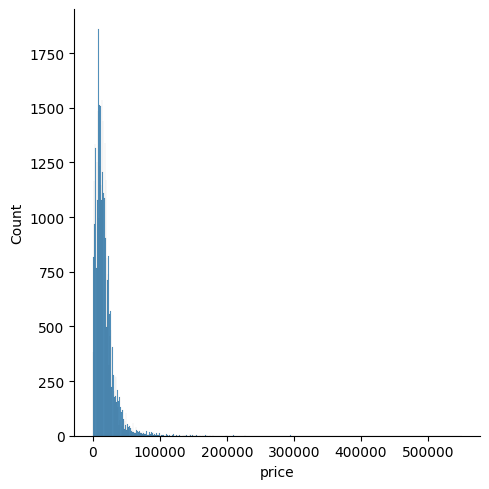

In [196]:
plt.figure()

sns.displot(df["price"])

plt.show()

Vemos que existen muchos coches con un precio más bajo, y que, para precios más elevados, se reduce el número. Para corregir esto, y aumentar la eficacia del modelo predictivo, vamos a aplicar una transformación logarítmica a la columna ```"price"```, de modo que los datos tiendan a una distribución normal. 

Al final, cuando ya esté hecho el modelo, habrá que deshacer esta transformación para obtener el precio real del vehículo a predecir.

In [197]:
# Transformación logarítmica del target

df["price"] = np.log(df["price"])

<Figure size 640x480 with 0 Axes>

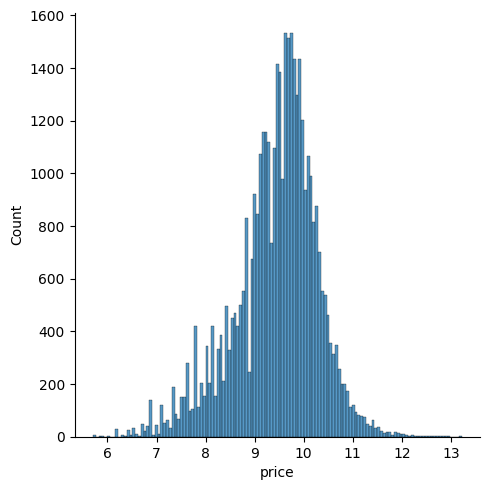

In [198]:
plt.figure()

sns.displot(df["price"])

plt.show()

Vemos como ahora los datos del target se distibuyen de forma gaussiana, por lo que el modelo funcionará mejor.

Vamos ahora a dividir los datos de X (features) e y (target).

In [199]:
X = df.drop("price", axis=1)
y = df["price"]

In [200]:
X

,make,model,fuel,year,kms,power,doors,shift,is_professional
0,11,154,1,2017.0,50071,82.0,5,0,1
1,23,769,0,2016.0,103000,100.0,5,0,1
2,70,200,0,2014.0,120000,140.0,5,0,1
3,23,768,0,2017.0,107000,130.0,3,0,1
4,52,33,1,2016.0,78665,130.0,5,0,1
...,...,...,...,...,...,...,...,...,...
41349,27,869,1,2018.0,47000,140.0,5,1,1
41350,56,463,0,2015.0,68750,150.0,3,0,1
41351,52,5,1,2019.0,21422,72.0,5,0,1
41352,4,625,1,2013.0,47900,450.0,5,1,1


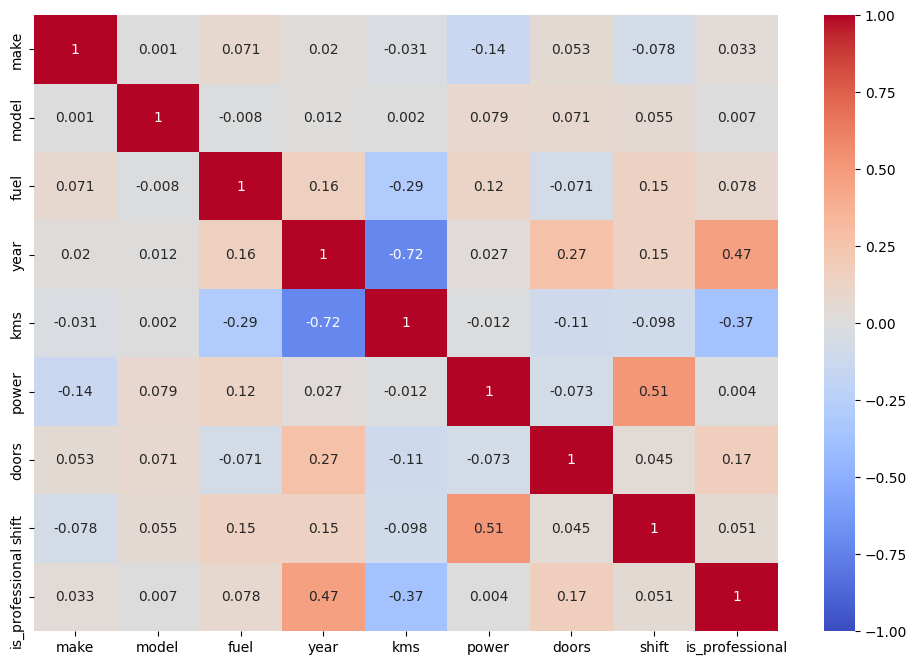

In [201]:
matriz_corr = X.corr(numeric_only=True).round(decimals=3)

plt.figure(figsize=(12, 8))

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

Separamos los datos de train y test:

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33083, 9)
(8271, 9)
(33083,)
(8271,)


Vamos a escalar los datos de X:

In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

# Guardamos el Scaler

with open('../utils/scaler.pkl', 'wb') as archivo_salida4:
    pickle.dump(scaler, archivo_salida4)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
X_train

array([[0.95774648, 0.14318182, 0.33333333, ..., 1.        , 1.        ,
        0.        ],
       [0.05633803, 0.10454545, 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       [0.05633803, 0.7125    , 0.16666667, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.09859155, 0.92613636, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.38028169, 0.9875    , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.78873239, 0.87045455, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [205]:
print(X_train.shape)
print(X_test.shape)

(33083, 9)
(8271, 9)


In [206]:
# Importamos los modelos de regresión que utilizaremos

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [ ]:
LinearRegression??

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Source:        
class LinearRegression(MultiOutputMixin, RegressorMixin, LinearModel):
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    copy_X : bool, default=True
        If True, X will be copied; else, it may be overwritten.

    n_jobs : int, default=None
        The number of jobs to use for the computation. This will only provide
        speedup in case of sufficiently large problems, that 

In [ ]:
# Linear Regression

param = {}

gs_lin_reg = GridSearchCV(estimator=LinearRegression(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

gs_lin_reg.fit(X_train, y_train)

y_pred = gs_lin_reg.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.12263890643418233
RMSE: 0.35019838154135197
MAE: 0.24283480660999157
MAPE: 0.026674827381996998
r2 score: 0.8281045559437334


In [ ]:
# Polynomial Regression

param = {}

for degree in range(1, 6):

    poly_feat = PolynomialFeatures(degree = degree)

    poly_feat.fit(X_train)

    X_train_poly = poly_feat.transform(X_train)
    X_test_poly = poly_feat.transform(X_test)


    gs_poly = GridSearchCV(estimator=LinearRegression(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

    gs_poly.fit(X_train_poly, y_train)

    y_pred = gs_poly.predict(X_test_poly)

    print(f"Poly Degree {degree}:")

    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

    print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")
    print(" ")

Poly Degree 1:
MSE: 0.12263890643417405
RMSE: 0.35019838154134014
MAE: 0.24283480660998097
MAPE: 0.02667482738199821
r2 score: 0.828104555943745
 
Poly Degree 2:
MSE: 0.09553850237884806
RMSE: 0.30909303191571313
MAE: 0.21626095775691423
MAPE: 0.02375512216669376
r2 score: 0.8660895325277835
 
Poly Degree 3:
MSE: 0.08651570093108019
RMSE: 0.2941355145695266
MAE: 0.20289091657348557
MAPE: 0.022274495442548163
r2 score: 0.8787362407102963
 
Poly Degree 4:
MSE: 0.07822994045467808
RMSE: 0.2796961573827536
MAE: 0.18819184106743264
MAPE: 0.02070191605399146
r2 score: 0.8903498837037568
 
Poly Degree 5:
MSE: 0.08486555397574838
RMSE: 0.2913169304653411
MAE: 0.18691347709280964
MAPE: 0.02054176356999331
r2 score: 0.8810491506333563
 


In [ ]:
# El mejor era el de grado 4:

degree = 4
poly_feat = PolynomialFeatures(degree = degree)

poly_feat.fit(X_train)

X_train_poly = poly_feat.transform(X_train)
X_test_poly = poly_feat.transform(X_test)


best_poly_model = GridSearchCV(estimator=LinearRegression(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

best_poly_model.fit(X_train_poly, y_train)

y_pred = best_poly_model.predict(X_test_poly)

print(f"Poly Degree {degree}:")

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

Poly Degree 4:
MSE: 0.07822994045467808
RMSE: 0.2796961573827536
MAE: 0.18819184106743264
MAPE: 0.02070191605399146
r2 score: 0.8903498837037568


In [ ]:
# RandomForest

param = {"n_estimators":[50, 100, 300], "max_depth":[3, 5, 9, 15, 33], "n_jobs":[-1], "random_state":[42]}

gs_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

gs_rf.fit(X_train, y_train)

y_pred = gs_rf.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.05451177584614221
RMSE: 0.2334775703277345
MAE: 0.14716693554127486
MAPE: 0.016401534487363343
r2 score: 0.9235941824024896


In [ ]:
rf_mae = 0.14716693554127486

np.exp(rf_mae)

1.1585473496167598

In [ ]:
gs_rf.best_params_

{'max_depth': 33, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 42}

In [ ]:
# ADA

param = {"n_estimators":[50, 100, 300], "learning_rate":np.arange(0.1, 1.1, 0.1), "random_state":[42]}

gs_ada = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

gs_ada.fit(X_train, y_train)

y_pred = gs_ada.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.13417289631483206
RMSE: 0.3662961865960825
MAE: 0.27355246852552073
MAPE: 0.02976218944479715
r2 score: 0.8119380687340745


In [ ]:
gs_ada.best_score_

-0.13393378710458156

In [ ]:
gs_ada.best_params_

{'learning_rate': 0.2, 'n_estimators': 100, 'random_state': 42}

In [ ]:
# Gradient Boost

param = {"n_estimators":[50, 100, 300], "learning_rate":np.arange(0.1, 1.1, 0.1), "random_state":[42]}

gs_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

gs_gb.fit(X_train, y_train)

y_pred = gs_gb.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.0506577541161925
RMSE: 0.2250727751554872
MAE: 0.14678620311136992
MAPE: 0.016289373829226954
r2 score: 0.9289961286195145


In [ ]:
# XG Boost

param = {}

gs_xgb = GridSearchCV(estimator=xgboost.XGBRegressor(), param_grid=param, cv=5, scoring="neg_mean_squared_error")

gs_xgb.fit(X_train, y_train)

y_pred = gs_xgb.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.04957618930949981
RMSE: 0.2226571115179118
MAE: 0.1445437798506806
MAPE: 0.016053499713784097
r2 score: 0.9305120917679779


In [ ]:
# Voting

# param = {"estimators":[gs_lin_reg.best_estimator_, best_poly_model.best_estimator_, gs_rf.best_estimator_, gs_ada.best_estimator_, gs_gb.best_estimator_, gs_xgb.best_estimator_],
#          "n_jobs":[-1]}

gs_voting = VotingRegressor(estimators=[("lin_reg", gs_lin_reg.best_estimator_), ("rf", gs_rf.best_estimator_), ("ada", gs_ada.best_estimator_), ("gb", gs_gb.best_estimator_), ("xgb", gs_xgb.best_estimator_)],
                            n_jobs=-1,)

gs_voting.fit(X_train, y_train)

y_pred = gs_voting.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.058796955833126205
RMSE: 0.2424808360120985
MAE: 0.1625740170213521
MAPE: 0.017986517228067562
r2 score: 0.9175879080631227


El Voting da peor. El modelo con mejores métricas es el XGradient Boost, aunque el RandomForest también estaba cerca. Vamos a ver si podemos mejorar algo de estos dos modelos mirando la importancia de las columnas (features) y realizando alguna modificación. Comenzamos con el RandomForest:

In [ ]:
gs_rf.best_estimator_.feature_importances_

array([0.02495883, 0.03147434, 0.00680901, 0.53096175, 0.07026803,
       0.32062588, 0.00500783, 0.00581581, 0.00407853])

Realizamos un dataframe con la importancia de las cada columna en el modelo RandomForest:

In [ ]:
df_feat_imp_rf = pd.DataFrame(gs_rf.best_estimator_.feature_importances_, index=X.columns)
df_feat_imp_rf = df_feat_imp_rf.rename(columns={0:"Feature Importance"}).sort_values("Feature Importance", ascending=False)
df_feat_imp_rf

,Feature Importance
year,0.530962
power,0.320626
kms,0.070268
model,0.031474
make,0.024959
fuel,0.006809
shift,0.005816
doors,0.005008
is_professional,0.004079


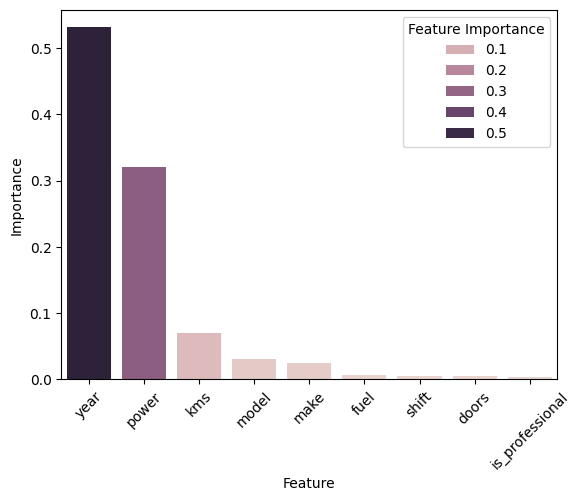

In [ ]:
plt.figure()

sns.barplot(df_feat_imp_rf,  x=df_feat_imp_rf.index, y=df_feat_imp_rf["Feature Importance"], orient="v", hue=df_feat_imp_rf["Feature Importance"])

plt.xlabel("Feature")
plt.ylabel("Importance")

plt.xticks(ticks=df_feat_imp_rf.index, rotation=45)

plt.show()

Se observa cómo las columnas con más importancia en el precio de un coche de segunda mano son, según nuestro modelo RandomForest, el año de matriculación, potencia del motor y kms recorridos. Las columnas de modelo y marca del coche también tienen algo de importancia, y las demás (combustible, cambio, puertas y si es profesional) tienen una importancia mucho menor.

Por esto, vamos a probar a hacer un Random Forest, con la misma parametrización que el mejor de antes, pero quitando las columnas menos importantes: ```["fuel", "shift", "doors", "is_professional"]```, a ver si mejora el modelo.

In [ ]:
# RF 2

X_rf_2 = X.drop(columns=["fuel", "shift", "doors", "is_professional"])
X_rf_2

,make,model,year,kms,power
0,11,154,2017.0,50071,82.0
1,23,769,2016.0,103000,100.0
2,70,200,2014.0,120000,140.0
3,23,768,2017.0,107000,130.0
4,52,33,2016.0,78665,130.0
...,...,...,...,...,...
41349,27,869,2018.0,47000,140.0
41350,56,463,2015.0,68750,150.0
41351,52,5,2019.0,21422,72.0
41352,4,625,2013.0,47900,450.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_rf_2, y, test_size=0.2, random_state=42)

print(X_train_rf2.shape)
print(X_test_rf2.shape)
print(y_train_rf2.shape)
print(y_test_rf2.shape)

(33083, 5)
(8271, 5)
(33083,)
(8271,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_rf2)
X_train_rf2 = scaler.transform(X_train_rf2)
X_test_rf2 = scaler.transform(X_test_rf2)

In [ ]:
# RandomForest

# param = {"n_estimators":[50, 100, 300], "max_depth":[3, 5, 9, 15, 33], "n_jobs":[-1], "random_state":[42]}

rf2 = RandomForestRegressor(n_estimators=300, max_depth=33, n_jobs=-1, random_state=42)

rf2.fit(X_train_rf2, y_train_rf2)

y_pred_rf2 = rf2.predict(X_test_rf2)

print(f"MSE: {metrics.mean_squared_error(y_test_rf2, y_pred_rf2)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test_rf2, y_pred_rf2))}")
print(f"MAE: {metrics.mean_absolute_error(y_test_rf2, y_pred_rf2)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test_rf2, y_pred_rf2)}")

print(f"r2 score: {metrics.r2_score(y_test_rf2, y_pred_rf2)}")

MSE: 0.05847540183637442
RMSE: 0.24181687665747073
MAE: 0.1534530278332284
MAPE: 0.017127734652352834
r2 score: 0.9180386106066045


Obtenemos un MSE más elevado que antes, por lo que no mejora. Nos quedamos entonces el XG Boost, que era el modelo con el MSE más bajo. Vamos a ver la importancia de las features en este modelo:

In [ ]:
xgb_model = xgboost.XGBRegressor()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")

print(f"r2 score: {metrics.r2_score(y_test, y_pred)}")

MSE: 0.04957618930949981
RMSE: 0.2226571115179118
MAE: 0.1445437798506806
MAPE: 0.016053499713784097
r2 score: 0.9305120917679779


In [ ]:
X.columns

Index(['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift',
       'is_professional'],
      dtype='object')

In [ ]:
xgb_model.feature_importances_

array([0.02589002, 0.01698136, 0.02746964, 0.40790918, 0.04341248,
       0.2574153 , 0.03125079, 0.16207652, 0.02759472], dtype=float32)

In [ ]:
df_feat_imp = pd.DataFrame(xgb_model.feature_importances_, index=X.columns)
df_feat_imp = df_feat_imp.rename(columns={0:"Feature Importance"}).sort_values("Feature Importance", ascending=False)
df_feat_imp

,Feature Importance
year,0.407909
power,0.257415
shift,0.162077
kms,0.043412
doors,0.031251
is_professional,0.027595
fuel,0.027470
make,0.025890
model,0.016981


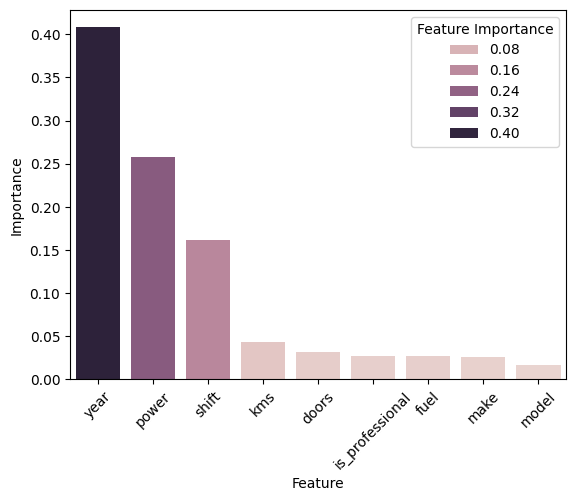

In [ ]:
plt.figure()

sns.barplot(df_feat_imp,  x=df_feat_imp.index, y=df_feat_imp["Feature Importance"], orient="v", hue=df_feat_imp["Feature Importance"])

plt.xlabel("Feature")
plt.ylabel("Importance")

plt.xticks(ticks=df_feat_imp.index, rotation=45)

plt.show()

Ahora observamos que las columnas más importantes siguen siendo ```"year"``` y ```"power"```. Sin embargo, el XGBoost le da mucha más importancia a la columna ```"shift"``` que el RandomForest previo, y menos a la columna ```"kms"```. Además la importancia de las columnas menos importantes es más elevada que en el anterior modelo, por lo que no descartaremos ninguna de estas columnas.

Vamos a deshacer la transformación que realizamos en la columna ```"price"``` (target) para ver la dimensión real de nuestras métricas:

In [ ]:
y_pred = xgb_model.predict(X_test)

y_test_final = np.exp(y_test)
y_pred_final = np.exp(y_pred)

print(f"MSE: {metrics.mean_squared_error(y_test_final, y_pred_final)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test_final, y_pred_final))}")
print(f"MAE: {metrics.mean_absolute_error(y_test_final, y_pred_final)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test_final, y_pred_final)}")

print(f"r2 score: {metrics.r2_score(y_test_final, y_pred_final)}")

MSE: 18272700.177901953
RMSE: 4274.657901856235
MAE: 2058.2645003178463
MAPE: 0.14780072255297733
r2 score: 0.9325618651446707


Vemos que el MAE = 2058 euros. Esto significa que para cada vehículo nos podemos ir esa cantidad de dinero de media en la predicción. 

El RMSE es algo mayor, 4274 euros, lo cual se debe a que existen unos pocos coches cuyo error es alto, y al hacer el error cuadrático este error se hace más grande.

En cuanto al MAPE, nos indica que nuestro modelo tiene un % de error medio del 15% sobre el precio del vehículo, el cual es algo elevado.

Vamos a exportar el modelo final:

In [ ]:
import pickle

with open("../model/modelo_final.pkl", 'wb') as archivo_salida:
    pickle.dump(xgb_model, archivo_salida)


Streamlit y función para meter inputs nuevos, función para train_test_split y escalar

In [ ]:
X.columns

Index(['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift',
       'is_professional'],
      dtype='object')

Función meter nuevos inputs:

In [ ]:
# Función para transformar un df con nuevos inputs en X, y para pasar al modelo.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pickle



def new_input_clean(input_df):
    '''
    Introduce los nuevos inputs en formato DataFrame con las columnas iniciales y devuelve los datos listos para introducirlos al modelo.

    El input DataFrame debe contener al menos las columnas (['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'is_professional'])
    '''

    excepciones = ['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'is_professional']

# Reemplazar NaN con 0 excepto en las columnas de excepciones (las que utiliza el modelo)
    input_df = input_df.fillna({col: 0 for col in input_df.columns if col not in excepciones})


    input_df = input_df.drop(columns="price_financed")
    input_df = input_df.drop(columns=["url", "company", 'dealer', 'province', 'country', 'publish_date', 'insert_date'])
    input_df = input_df.drop(index=(input_df.loc[df.loc[:, "power"].isna() == True, :]).index)
    input_df = input_df.drop(columns="color")
    input_df = input_df.drop(index=(input_df.loc[df.loc[:, "shift"].isna() == True, :]).index)
    input_df = input_df.dropna()

    encoder_make = pickle.load(open("../utils/label_encoder_make.pkl", 'rb'))
    encoder_model = pickle.load(open("../utils/label_encoder_model.pkl", 'rb'))

    # encoder_make = LabelEncoder()
    # encoder_make.fit(df["make"].sort_values(ascending=False))
    list(encoder_make.classes_)
    input_df["make"] = encoder_make.transform(input_df["make"])

#     encoder_model = LabelEncoder()
#     encoder_model.fit(df["model"].sort_values(ascending=False))
    list(encoder_model.classes_)
    input_df["model"] = encoder_model.transform(input_df["model"])

    input_df = input_df.drop(columns="version")

    fuel_types = {"Diésel" : 0,
            "Gasolina" : 1,
            "Híbrido" : 2,
            "Eléctrico" : 3,
            "Híbrido enchufable" : 4, 
            "Gas licuado (GLP)" : 5,
            "Gas natural (CNG)" : 6}
                     
    input_df["fuel"] = input_df["fuel"].map(fuel_types)

    num_puertas = {5: 5,
            4 : 5,
            3 : 3,
            2 : 3}
    
    input_df["doors"] = input_df["doors"].map(num_puertas)
    
    input_df["shift"] = input_df["shift"].apply(lambda x: 0 if x == "Manual" else 1)

    input_df = input_df.drop(columns="photos")

    input_df["is_professional"] = input_df["is_professional"].apply(lambda x: 1 if x == True else 0)

    input_df["price"] = np.log(input_df["price"])

    X_input = input_df.drop("price", axis=1)
    y_input = input_df["price"]
    
#     scaler = MinMaxScaler()
    
#     scaler.fit(X_input)

    scaler = pickle.load(open("../utils/scaler.pkl", 'rb'))

    X_input = scaler.transform(X_input)

    return [X_input, y_input]



In [ ]:
# Función para hacer predicciones

def predict(X_input):
    return loaded_model.predict(X_input)

In [ ]:
# Función para deshacer la transformación y devolver el precio:

import numpy as np

def destransformar_y(y_out):
    return np.exp(y_out)


Vamos ahora a cargar el modelo y probarlo con un DataFrame de prueba con coches, para ver el precio que predice. 

Importante: Las columnas ```['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'is_professional']``` no pueden contener NaN.

In [ ]:
import pickle

loaded_model = pickle.load(open("../model/modelo_final.pkl", 'rb'))

In [ ]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
df_prueba = pd.read_csv("../data/raw/coches_prueba_df.csv")
df_prueba

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,730424e9e3d55f590709d0c843021ec4,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Fiesta,FORD Fiesta 3p.,1500,NaN,Diésel,2004,205000,...,3,Manual,Negro,3,False,2a7de613f57460323e61a1de9952cdf4,Lleida,Spain,2021-01-12 13:02:20,2021-01-15 00:00:00
1,776abe3de2f4fde98b80a06f6dcc7da1,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,e-2008,PEUGEOT e2008 Electrico GT Line 5p.,35900,35200,Eléctrico,2020,1,...,5,Automático,Azul,6,True,PEUGEOT Joaquin Oliva,Tarragona,Spain,2021-01-15 10:35:56,2021-01-15 00:00:00
2,346c1cecd85155ce039aa9f89771e6be,9881bcdd5a0ad4733037b3fb25e69c3a,TOYOTA,Aygo,TOYOTA Aygo 1.0 70 xclusiv 5p.,5499,NaN,Gasolina,2016,136000,...,5,Manual,Azul,10,False,f384f99c5e39dd0fb2b45fe1bf527c6c,Málaga,Spain,2020-11-16 07:59:38,2021-01-15 00:00:00
3,96a96d1a27b29a91a087e80d074a11fb,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 5p.,6500,NaN,Diésel,2010,170600,...,5,Manual,Azul,2,False,d8c8aa18b685b78e7eed7d99c87ea5d5,Álava,Spain,2020-12-13 17:46:09,2021-01-15 00:00:00
4,c6aecea210008f6cd97be81d2c472eb8,9881bcdd5a0ad4733037b3fb25e69c3a,OPEL,Tigra,OPEL Tigra Sport 1.4 2p.,3750,NaN,Gasolina,2005,190000,...,2,Manual,Azul,16,True,Autos Mostoles,Madrid,Spain,2021-01-12 17:28:45,2021-01-15 00:00:00
5,ea5c7ccb3ed4700ed71b605e7b93bafa,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,208,PEUGEOT 208 PureTech 73kW 100CV GT Line 5p.,17600,16100,Gasolina,2020,7727,...,5,Manual,Rojo,24,True,Vallescar Ocasion,Barcelona,Spain,2020-12-30 19:14:41,2021-01-15 00:00:00
6,5a4a01690abfcb33c484792109435ce6,9881bcdd5a0ad4733037b3fb25e69c3a,NISSAN,Micra,NISSAN Micra IGT 66 kW 90 CV SS Acenta 5p.,10985,8585,Gasolina,2017,19638,...,5,Manual,Gris / Plata,47,True,REKORD MOTOR,Barcelona,Spain,2021-01-12 19:35:42,2021-01-15 00:00:00
7,0b603bd188cf5d378d4475143400dbcb,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 320D 4p.,21000,NaN,Diésel,2017,70000,...,4,Automático,Blanco,0,False,e355ec3b68d0fffc37d181f2da9d2fa3,Madrid,Spain,2020-12-25 18:14:00,2021-01-15 00:00:00
8,c8c2c213457aa0231d373c3648dd69a2,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 318d 4p.,8500,NaN,Diésel,2008,180000,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Almería,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00
9,c8c2c213457aa0231d369a2,9881bcd733037b3fb25e69c3a,SEAT,Arona,4p.,19500,Hola,Diésel,2018,21000,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Pontevedra,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00


In [ ]:
df_prueba

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,730424e9e3d55f590709d0c843021ec4,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Fiesta,FORD Fiesta 3p.,1500,NaN,Diésel,2004,205000,...,3,Manual,Negro,3,False,2a7de613f57460323e61a1de9952cdf4,Lleida,Spain,2021-01-12 13:02:20,2021-01-15 00:00:00
1,776abe3de2f4fde98b80a06f6dcc7da1,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,e-2008,PEUGEOT e2008 Electrico GT Line 5p.,35900,35200,Eléctrico,2020,1,...,5,Automático,Azul,6,True,PEUGEOT Joaquin Oliva,Tarragona,Spain,2021-01-15 10:35:56,2021-01-15 00:00:00
2,346c1cecd85155ce039aa9f89771e6be,9881bcdd5a0ad4733037b3fb25e69c3a,TOYOTA,Aygo,TOYOTA Aygo 1.0 70 xclusiv 5p.,5499,NaN,Gasolina,2016,136000,...,5,Manual,Azul,10,False,f384f99c5e39dd0fb2b45fe1bf527c6c,Málaga,Spain,2020-11-16 07:59:38,2021-01-15 00:00:00
3,96a96d1a27b29a91a087e80d074a11fb,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 5p.,6500,NaN,Diésel,2010,170600,...,5,Manual,Azul,2,False,d8c8aa18b685b78e7eed7d99c87ea5d5,Álava,Spain,2020-12-13 17:46:09,2021-01-15 00:00:00
4,c6aecea210008f6cd97be81d2c472eb8,9881bcdd5a0ad4733037b3fb25e69c3a,OPEL,Tigra,OPEL Tigra Sport 1.4 2p.,3750,NaN,Gasolina,2005,190000,...,2,Manual,Azul,16,True,Autos Mostoles,Madrid,Spain,2021-01-12 17:28:45,2021-01-15 00:00:00
5,ea5c7ccb3ed4700ed71b605e7b93bafa,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,208,PEUGEOT 208 PureTech 73kW 100CV GT Line 5p.,17600,16100,Gasolina,2020,7727,...,5,Manual,Rojo,24,True,Vallescar Ocasion,Barcelona,Spain,2020-12-30 19:14:41,2021-01-15 00:00:00
6,5a4a01690abfcb33c484792109435ce6,9881bcdd5a0ad4733037b3fb25e69c3a,NISSAN,Micra,NISSAN Micra IGT 66 kW 90 CV SS Acenta 5p.,10985,8585,Gasolina,2017,19638,...,5,Manual,Gris / Plata,47,True,REKORD MOTOR,Barcelona,Spain,2021-01-12 19:35:42,2021-01-15 00:00:00
7,0b603bd188cf5d378d4475143400dbcb,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 320D 4p.,21000,NaN,Diésel,2017,70000,...,4,Automático,Blanco,0,False,e355ec3b68d0fffc37d181f2da9d2fa3,Madrid,Spain,2020-12-25 18:14:00,2021-01-15 00:00:00
8,c8c2c213457aa0231d373c3648dd69a2,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 318d 4p.,8500,NaN,Diésel,2008,180000,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Almería,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00
9,c8c2c213457aa0231d369a2,9881bcd733037b3fb25e69c3a,SEAT,Arona,4p.,19500,Hola,Diésel,2018,21000,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Pontevedra,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00


In [ ]:
X_input, y_input = new_input_clean(input_df=df_prueba)

In [ ]:
predictions = loaded_model.predict(X_input)
predictions

array([ 7.587689 , 10.338383 ,  8.7033825,  8.933454 ,  8.087106 ,
        9.714876 ,  9.2725935, 10.165454 ,  8.864722 ,  9.982693 ],
      dtype=float32)

In [ ]:
y_prueba = destransformar_y(predictions).round(0)
y_prueba

array([ 1974., 30896.,  6023.,  7581.,  3252., 16562., 10642., 25990.,
        7078., 21649.], dtype=float32)

Insertamos las predicciones realizadas en la columna ```"predicted_price"```, al lado de la columna target ```"price"```:

In [ ]:
df_prueba.insert(6, "predicted_price", y_prueba)
df_prueba

,url,company,make,model,version,price,predicted_price,price_financed,fuel,year,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,730424e9e3d55f590709d0c843021ec4,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Fiesta,FORD Fiesta 3p.,1500,1974.0,NaN,Diésel,2004,...,3,Manual,Negro,3,False,2a7de613f57460323e61a1de9952cdf4,Lleida,Spain,2021-01-12 13:02:20,2021-01-15 00:00:00
1,776abe3de2f4fde98b80a06f6dcc7da1,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,e-2008,PEUGEOT e2008 Electrico GT Line 5p.,35900,30896.0,35200,Eléctrico,2020,...,5,Automático,Azul,6,True,PEUGEOT Joaquin Oliva,Tarragona,Spain,2021-01-15 10:35:56,2021-01-15 00:00:00
2,346c1cecd85155ce039aa9f89771e6be,9881bcdd5a0ad4733037b3fb25e69c3a,TOYOTA,Aygo,TOYOTA Aygo 1.0 70 xclusiv 5p.,5499,6023.0,NaN,Gasolina,2016,...,5,Manual,Azul,10,False,f384f99c5e39dd0fb2b45fe1bf527c6c,Málaga,Spain,2020-11-16 07:59:38,2021-01-15 00:00:00
3,96a96d1a27b29a91a087e80d074a11fb,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Golf,VOLKSWAGEN Golf 5p.,6500,7581.0,NaN,Diésel,2010,...,5,Manual,Azul,2,False,d8c8aa18b685b78e7eed7d99c87ea5d5,Álava,Spain,2020-12-13 17:46:09,2021-01-15 00:00:00
4,c6aecea210008f6cd97be81d2c472eb8,9881bcdd5a0ad4733037b3fb25e69c3a,OPEL,Tigra,OPEL Tigra Sport 1.4 2p.,3750,3252.0,NaN,Gasolina,2005,...,2,Manual,Azul,16,True,Autos Mostoles,Madrid,Spain,2021-01-12 17:28:45,2021-01-15 00:00:00
5,ea5c7ccb3ed4700ed71b605e7b93bafa,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,208,PEUGEOT 208 PureTech 73kW 100CV GT Line 5p.,17600,16562.0,16100,Gasolina,2020,...,5,Manual,Rojo,24,True,Vallescar Ocasion,Barcelona,Spain,2020-12-30 19:14:41,2021-01-15 00:00:00
6,5a4a01690abfcb33c484792109435ce6,9881bcdd5a0ad4733037b3fb25e69c3a,NISSAN,Micra,NISSAN Micra IGT 66 kW 90 CV SS Acenta 5p.,10985,10642.0,8585,Gasolina,2017,...,5,Manual,Gris / Plata,47,True,REKORD MOTOR,Barcelona,Spain,2021-01-12 19:35:42,2021-01-15 00:00:00
7,0b603bd188cf5d378d4475143400dbcb,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 320D 4p.,21000,25990.0,NaN,Diésel,2017,...,4,Automático,Blanco,0,False,e355ec3b68d0fffc37d181f2da9d2fa3,Madrid,Spain,2020-12-25 18:14:00,2021-01-15 00:00:00
8,c8c2c213457aa0231d373c3648dd69a2,9881bcdd5a0ad4733037b3fb25e69c3a,BMW,Serie 3,BMW Serie 3 318d 4p.,8500,7078.0,NaN,Diésel,2008,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Almería,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00
9,c8c2c213457aa0231d369a2,9881bcd733037b3fb25e69c3a,SEAT,Arona,4p.,19500,21649.0,Hola,Diésel,2018,...,4,Manual,Blanco,5,False,6575f7a4e9ad7c10fb4ff036d9ae2c04,Pontevedra,Spain,2020-11-09 10:55:56,2021-01-15 00:00:00


In [ ]:
encoder_make.classes_

array(['ABARTH', 'ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 'AUDI', 'AUSTIN',
       'BENTLEY', 'BMW', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN',
       'CORVETTE', 'CUPRA', 'DACIA', 'DAEWOO', 'DAIHATSU', 'DFSK',
       'DODGE', 'DR AUTOMOBILES', 'DS', 'FERRARI', 'FIAT', 'FORD',
       'GALLOPER', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'IVECO', 'IVECO-PEGASO', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI',
       'LANCIA', 'LAND-ROVER', 'LDV', 'LEXUS', 'LOTUS', 'MAHINDRA',
       'MASERATI', 'MAXUS', 'MAZDA', 'MERCEDES-BENZ', 'MG', 'MINI',
       'MITSUBISHI', 'MORGAN', 'NISSAN', 'OPEL', 'PEUGEOT', 'PIAGGIO',
       'PONTIAC', 'PORSCHE', 'RENAULT', 'ROVER', 'SAAB', 'SANTANA',
       'SEAT', 'SKODA', 'SMART', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TATA',
       'TESLA', 'TOYOTA', 'UMM', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

Voy a probar con un RandomForest, a ver si hace mejor las marcas menos comunes.

In [ ]:
# RF 3

X_rf_3 = X
X_rf_3

,make,model,fuel,year,kms,power,doors,shift,is_professional
0,11,154,1,2017.0,50071,82.0,5,0,1
1,23,769,0,2016.0,103000,100.0,5,0,1
2,70,200,0,2014.0,120000,140.0,5,0,1
3,23,768,0,2017.0,107000,130.0,3,0,1
4,52,33,1,2016.0,78665,130.0,5,0,1
...,...,...,...,...,...,...,...,...,...
41349,27,869,1,2018.0,47000,140.0,5,1,1
41350,56,463,0,2015.0,68750,150.0,3,0,1
41351,52,5,1,2019.0,21422,72.0,5,0,1
41352,4,625,1,2013.0,47900,450.0,5,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train_rf3, X_test_rf3, y_train_rf3, y_test_rf3 = train_test_split(X_rf_3, y, test_size=0.2, random_state=42)

print(X_train_rf3.shape)
print(X_test_rf3.shape)
print(y_train_rf3.shape)
print(y_test_rf3.shape)

(33083, 9)
(8271, 9)
(33083,)
(8271,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_rf3)
X_train_rf3 = scaler.transform(X_train_rf3)
X_test_rf3 = scaler.transform(X_test_rf3)

In [ ]:
# RandomForest

# param = {"n_estimators":[50, 100, 300], "max_depth":[3, 5, 9, 15, 33], "n_jobs":[-1], "random_state":[42]}

rf3 = RandomForestRegressor(n_estimators=300, max_depth=33, n_jobs=-1, random_state=42)

rf3.fit(X_train_rf3, y_train_rf3)

y_pred_rf3 = rf3.predict(X_test_rf3)

print(f"MSE: {metrics.mean_squared_error(y_test_rf3, y_pred_rf3)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test_rf3, y_pred_rf3))}")
print(f"MAE: {metrics.mean_absolute_error(y_test_rf3, y_pred_rf3)}")
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test_rf3, y_pred_rf3)}")

print(f"r2 score: {metrics.r2_score(y_test_rf3, y_pred_rf3)}")

MSE: 0.05451177584614221
RMSE: 0.2334775703277345
MAE: 0.14716693554127486
MAPE: 0.016401534487363343
r2 score: 0.9235941824024896


In [ ]:
X.columns

Index(['make', 'model', 'fuel', 'year', 'kms', 'power', 'doors', 'shift',
       'is_professional'],
      dtype='object')

In [ ]:
df.columns

Index(['make', 'model', 'price', 'fuel', 'year', 'kms', 'power', 'doors',
       'shift', 'is_professional'],
      dtype='object')

In [ ]:
df_inic = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
print(df_inic.loc[(df_inic.loc[:, "is_professional"] == False), :])

                                    url                           company  \
0      e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
7      2ad681959d278f32a83c3ad7be35443e  9881bcdd5a0ad4733037b3fb25e69c3a   
8      3cb810cd0cd871eb6d5c38832f5f8beb  9881bcdd5a0ad4733037b3fb25e69c3a   
9      13b881bdd31a0387edd64edd726e8c93  9881bcdd5a0ad4733037b3fb25e69c3a   
11     8dadc0a13657e83e90a972e74456f701  9881bcdd5a0ad4733037b3fb25e69c3a   
...                                 ...                               ...   
49975  1edbf427d3b322e01520da82b0da63ac  9881bcdd5a0ad4733037b3fb25e69c3a   
49977  a3e8c8b33bff2351117ec1db62c3c51e  9881bcdd5a0ad4733037b3fb25e69c3a   
49978  383b5fca42e098c2c2986210d47f2de8  9881bcdd5a0ad4733037b3fb25e69c3a   
49985  d4b3c060929334737de6182b05311312  9881bcdd5a0ad4733037b3fb25e69c3a   
49990  22c3253f7acac12eda1784ef4ce901d4  9881bcdd5a0ad4733037b3fb25e69c3a   

             make     model  \
0            SEAT    Toledo   
7           H

In [ ]:
df_inic = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
print(df_inic.loc[(df_inic.loc[:, "make"] == "FERRARI") & (df_inic.loc[:, "model"] == "355"), :].to_string())

                                    url                           company     make model                          version  price  price_financed      fuel    year    kms  power  doors   shift color  photos  is_professional     dealer province country         publish_date          insert_date
20070  793d48c05c17cacf69a8b77ad7754a56  9881bcdd5a0ad4733037b3fb25e69c3a  FERRARI   355  FERRARI 355 F355 BERLINETTA 2p.  99500             NaN  Gasolina  1996.0  42199  380.0      2  Manual  Rojo      47             True  +Q Coches   Toledo   Spain  2020-10-26 00:44:41  2021-01-15 00:00:00


In [ ]:
df_inic = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
print(df_inic.loc[(df_inic.loc[:, "make"] == "CUPRA") & (df_inic.loc[:, "model"] == "Formentor"), :].to_string())

                                    url                           company   make      model                                                 version  price  price_financed      fuel    year   kms  power  doors       shift                         color  photos  is_professional                 dealer  province country         publish_date          insert_date
6620   9f5e6d248cc1f14ad2c180499f623e87  9881bcdd5a0ad4733037b3fb25e69c3a  CUPRA  Formentor  CUPRA Formentor 2.0 TSI 228kW 310 CV VZ 4Drive DSG 5p.  42400             NaN  Gasolina  2020.0  5200  310.0      5  Automático                        Blanco      15             True       ImportarCoche.es  Valencia   Spain  2020-12-28 13:15:50  2021-01-15 00:00:00
11258  1d5e1840ac73825f3e0c6c88212ee660  9881bcdd5a0ad4733037b3fb25e69c3a  CUPRA  Formentor                CUPRA Formentor 1.5 TSI 110kW 150 CV 5p.  30500         27500.0  Gasolina  2020.0  2000  150.0      5      Manual  Gris / Plata (Gris Magnetic)      22             True       

In [ ]:
new_df = pd.DataFrame(columns=['make', 'model', 'price', 'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'is_professional'])

# new_input = ["ABARTH", "124 Spider", 35000.0, "Diésel", 2018, 50000, 100, 5, "Manual", False]
# new_input = ["SEAT", "Arona", 19500.0, "Diésel", 2018, 21000, 125, 5, "Manual", False]
# new_input = ["CUPRA", "Formentor", 30500.0, "Gasolina", 2021, 10, 150, 5, "Manual", True]
# new_input = ["CUPRA", "Formentor", 45500.0, "Gasolina", 2021, 10, 310, 5, "Automático", True]
new_input = ["FERRARI", "355", 99500.0, "Gasolina", 2005, 42000, 380, 3, "Manual", True]



new_df.loc[-1, :] = new_input

new_df

,make,model,price,fuel,year,kms,power,doors,shift,is_professional
-1,FERRARI,355,99500.0,Gasolina,2005,42000,380,3,Manual,True


In [ ]:
new_df["make"] = encoder_make.transform(new_df["make"])
new_df["model"] = encoder_model.transform(new_df["model"])

new_df["price"] = new_df["price"].astype("float")
new_df["year"] = new_df["year"].astype("float")
new_df["kms"] = new_df["kms"].astype("float")
new_df["power"] = new_df["power"].astype("float")


fuel_types = {"Diésel" : 0,
        "Gasolina" : 1,
        "Híbrido" : 2,
        "Eléctrico" : 3,
        "Híbrido enchufable" : 4, 
        "Gas licuado (GLP)" : 5,
        "Gas natural (CNG)" : 6}
                    
new_df["fuel"] = new_df["fuel"].map(fuel_types)

num_puertas = {5: 5,
        4 : 5,
        3 : 3,
        2 : 3}

new_df["doors"] = new_df["doors"].map(num_puertas)

new_df["shift"] = new_df["shift"].apply(lambda x: 0 if x == "Manual" else 1)

new_df["is_professional"] = new_df["is_professional"].apply(lambda x: 1 if x == True else 0)

In [ ]:
new_df["fuel"]

-1    1
Name: fuel, dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, -1 to -1
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             1 non-null      int32  
 1   model            1 non-null      int32  
 2   price            1 non-null      float64
 3   fuel             1 non-null      int64  
 4   year             1 non-null      float64
 5   kms              1 non-null      float64
 6   power            1 non-null      float64
 7   doors            1 non-null      int64  
 8   shift            1 non-null      int64  
 9   is_professional  1 non-null      int64  
dtypes: float64(4), int32(2), int64(4)
memory usage: 188.0 bytes


In [ ]:
new_df["price"] = np.log(new_df["price"])

X_new = new_df.drop("price", axis=1)
y_new = new_df["price"]

X_new = scaler.transform(X_new)

predictions = rf3.predict(X_new)

y_prueba = destransformar_y(predictions).round(0)

y_prueba

array([57093.])

Esta mierda overfittea, si le cambias el año a uno más nuevo al Ferrari, da mierda ya.

Pruebas:

1. Probar con el RF a ver si hace mejor esas marcas. --> Nah, mejora el cupra más barato pero empeora el más caro. El Ferrari va bastante peor.
2. Quitar los modelos de los que haya pocas muestras o algo así.
3. Probar Deep Learning.